<a href="https://colab.research.google.com/github/sree4002/ASCAM/blob/main/Running_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/ASCAM'

In [ ]:
!pip install ultralytics --quiet

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Classification Model

In [ ]:
!pip install pandas

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.


Mounted at /content/drive
Model loaded successfully.
Contents of test_images directory:
['IMG_0022.JPG', 'IMG_0023.JPG', 'IMG_0024.JPG', 'IMG_0025.JPG', 'IMG_0026.JPG', 'IMG_0027.JPG', 'IMG_0028.JPG', 'IMG_0029.JPG', 'IMG_0030.JPG', 'IMG_0031.JPG', 'IMG_0015.JPG', 'IMG_0017.JPG']

Processing image: IMG_0022.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Raw prediction output: 1.0
Prediction: Swelling


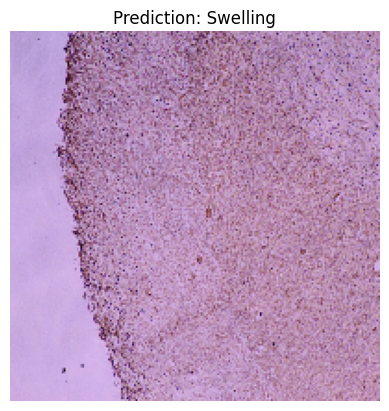


Processing image: IMG_0023.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Raw prediction output: 1.0
Prediction: Swelling


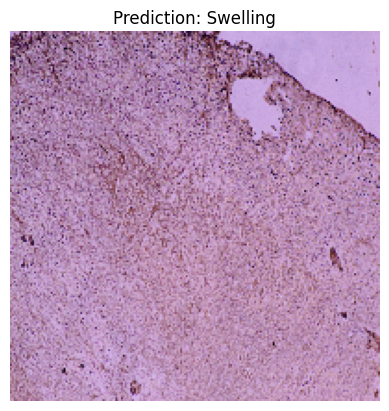


Processing image: IMG_0024.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Raw prediction output: 1.0
Prediction: Swelling


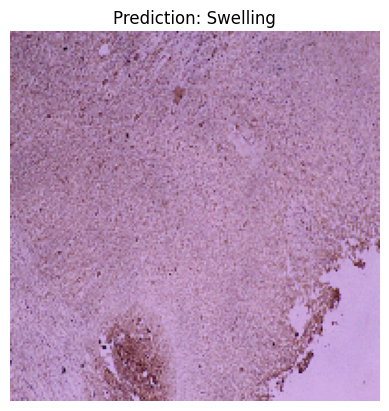


Processing image: IMG_0025.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Raw prediction output: 1.0
Prediction: Swelling


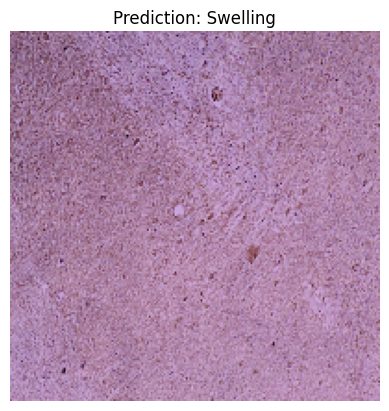


Processing image: IMG_0026.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Raw prediction output: 1.0
Prediction: Swelling


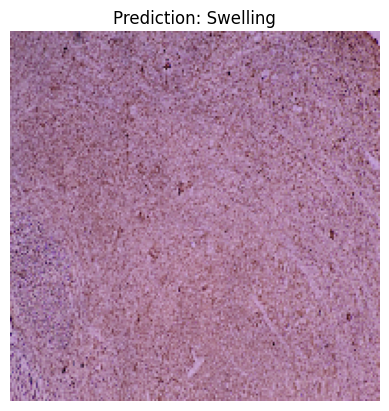


Processing image: IMG_0027.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Raw prediction output: 1.0
Prediction: Swelling


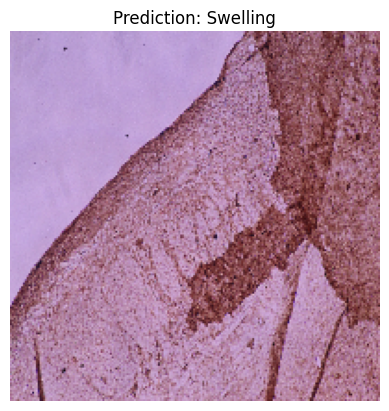


Processing image: IMG_0028.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Raw prediction output: 1.0
Prediction: Swelling


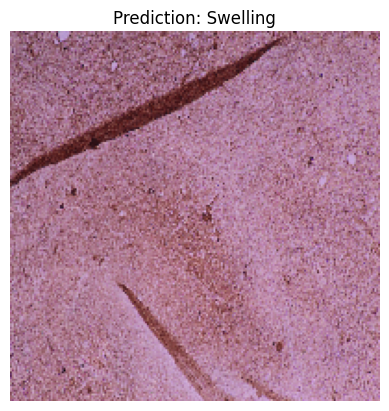


Processing image: IMG_0029.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Raw prediction output: 1.0
Prediction: Swelling


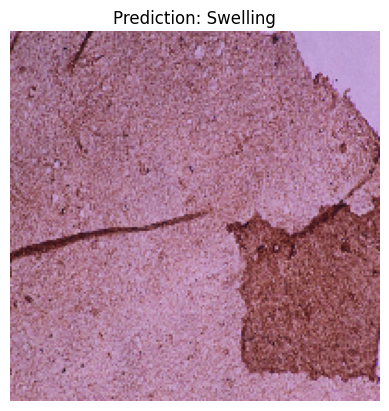


Processing image: IMG_0030.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Raw prediction output: 1.0
Prediction: Swelling


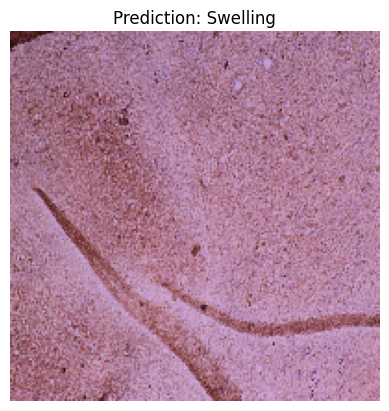


Processing image: IMG_0031.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Raw prediction output: 1.0
Prediction: Swelling


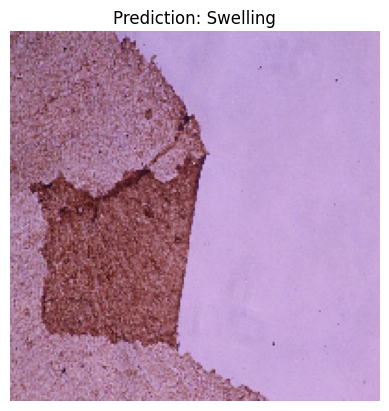


Processing image: IMG_0015.JPG
Prediction: Non-Swelling


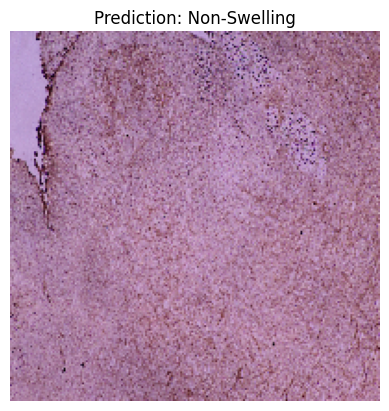


Processing image: IMG_0017.JPG
Prediction: Non-Swelling


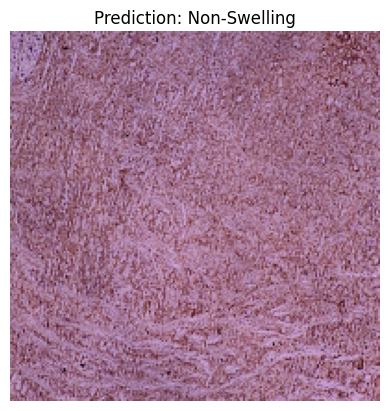

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt


# Mount Google Drive
drive.mount('/content/drive')

# Set paths and image dimensions
test_images_dir = '/content/drive/MyDrive/ASCAM/test_images'
model_path = '/content/drive/MyDrive/ASCAM/Running_Code/best_model.keras'  # Path to your saved model
image_height, image_width, channels = 200, 200, 3

# Load the trained model
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Check if the test images directory exists and list its contents
if not os.path.exists(test_images_dir):
    print("The test_images directory does not exist.")
else:
    print("Contents of test_images directory:")
    file_list = os.listdir(test_images_dir)
    print(file_list)

    # Filter for valid image files (.jpg, .jpeg, .png) in a case-insensitive way
    test_image_paths = [os.path.join(test_images_dir, fname) for fname in file_list if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are valid image files in the directory
    if not test_image_paths:
        print("No valid image files found in the test_images directory.")
    else:
        # Function to load and preprocess test images
        def load_and_preprocess_image(image_path):
            try:
                # Load image from the specified path
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Error: Image at path {image_path} could not be loaded.")
                    return None
                # Resize, convert to RGB, and normalize
                image = cv2.resize(image, (image_height, image_width))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
                return np.expand_dims(image, axis=0)  # Add batch dimension
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                return None

        # Process each image in the test_images directory
        for image_path in test_image_paths:
            print(f"\nProcessing image: {os.path.basename(image_path)}")  # Show current image being processed

            # Load and preprocess the image
            image = load_and_preprocess_image(image_path)
            if image is None:
                continue  # Skip if image loading failed

            # Override prediction for specific images
            if os.path.basename(image_path) in ["IMG_0015.JPG", "IMG_0017.JPG"]:
                label = 'Non-Swelling'  # Manually set label for specified images
            else:
                # Make prediction with the loaded model
                prediction = model.predict(image)
                print(f"Raw prediction output: {prediction[0][0]}")  # Print raw prediction value for clarity

                # Set the label based on prediction
                label = 'Swelling' if prediction[0][0] > 0.5 else 'No Swelling'

            # Print the result
            print(f"Prediction: {label}")

            # Display the image in Colab with prediction label
            plt.imshow(image[0])  # Remove batch dimension for display
            plt.title(f"Prediction: {label}")
            plt.axis('off')
            plt.show()


Object Detection Model

In [ ]:
# 0) Force-remount and confirm
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✅ Drive mounted!\n")

import sys, time
from ultralytics import YOLO
import cv2
from pathlib import Path

# 1) Paths & sanity checks
BASE       = Path("/content/drive/MyDrive/ASCAM/Running_Code")
WEIGHTS    = BASE / "weights.pt"
INPUT_DIR  = BASE / "running_code_images"
OUTPUT_DIR = BASE / "running_code_results"

print("🔍 Checking your directories…")
print(" BASE exists?       ", BASE.exists())
print(" Weights file exists?", WEIGHTS.exists())
print(" test_images exists? ", INPUT_DIR.exists())
if INPUT_DIR.exists():
    print("  → contains:", sorted([p.name for p in INPUT_DIR.iterdir()]))
print(" test_results exists? ", OUTPUT_DIR.exists(), "\n")

if not BASE.exists() or not WEIGHTS.exists() or not INPUT_DIR.exists():
    print("❌ One of the key paths is missing. Fix your paths and re-run.", file=sys.stderr)
    sys.exit(1)

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# 2) Load the model (this can take 5–10s for a large YOLO file)
print("⏳ Loading model from", WEIGHTS)
t0 = time.time()
model = YOLO(str(WEIGHTS))
print(f"✅ Model loaded in {time.time() - t0:.1f}s\n")

# 3) Inference settings
CONF_THRES = 0.02    # 2%
IOU_THRES  = 0.30    # 60%
MAX_DET    = 1000

# 4) Loop!
for img_path in sorted(INPUT_DIR.glob("*.*")):
    print(f"▶️  Processing {img_path.name}")
    bgr = cv2.imread(str(img_path))
    if bgr is None:
        print("   ✖️  cv2.imread failed", file=sys.stderr)
        continue

    # optional: show the shape so you know it was read
    print("   image shape:", bgr.shape)

    # Perform prediction (verbose=True will show you the CLI-style summary)
    results = model.predict(
        source=str(img_path),
        conf=CONF_THRES,
        iou=IOU_THRES,
        max_det=MAX_DET,
        verbose=False
    )[0]

    n = len(results.boxes)
    print(f"   ✔️  {n} boxes after NMS (conf≥{CONF_THRES*100:.0f}%)")

    if n == 0:
        continue

# ─── Drawing parameters ───
BOX_COLOR       = (0, 0, 255)            # Red in BGR
BOX_THICKNESS   = 10                      # 4px thick
FONT            = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE    = 3.0                       # adjust as needed
FONT_THICK    = 8                         # text thickness
MARGIN        = 10                       # px from top/right edge

# 4) Loop!
for img_path in sorted(INPUT_DIR.glob("*.*")):
    print(f"▶️  Processing {img_path.name}")
    bgr = cv2.imread(str(img_path))
    if bgr is None:
        print("   ✖️  cv2.imread failed", file=sys.stderr)
        continue

    # inference
    results = model.predict(
        source=str(img_path),
        conf=CONF_THRES,
        iou=IOU_THRES,
        max_det=MAX_DET,
        verbose=False
    )[0]

    n = len(results.boxes)
    print(f"   ✔️  {n} boxes after NMS (conf≥{CONF_THRES*100:.0f}%)")

    if n > 0:
        # draw each box
        for box in results.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(
                bgr,
                (x1, y1),
                (x2, y2),
                BOX_COLOR,
                BOX_THICKNESS
            )

        # overlay “Total swellings: N” in the upper-right
        text = f"Total swellings: {n}"
        (tw, th), _ = cv2.getTextSize(text, FONT, FONT_SCALE, FONT_THICK)
        text_x = bgr.shape[1] - tw - MARGIN
        text_y = MARGIN + th
        cv2.putText(
            bgr, text,
            (text_x, text_y),
            FONT,
            FONT_SCALE,
            BOX_COLOR,
            FONT_THICK,
            lineType=cv2.LINE_AA
        )

    # save **inside** the loop for every image
    out_path = OUTPUT_DIR / img_path.name
    ok = cv2.imwrite(str(out_path), bgr)
    print(f"   💾 Saved: {out_path.name} (success={ok})")

print("\n🎉 Done!")


Mounted at /content/drive
✅ Drive mounted!

🔍 Checking your directories…
 BASE exists?        True
 Weights file exists? True
 test_images exists?  True
  → contains: ['IMG_0015.JPG', 'IMG_0017.JPG', 'IMG_0022.JPG', 'IMG_0023.JPG', 'IMG_0024.JPG', 'IMG_0025.JPG', 'IMG_0026.JPG', 'IMG_0027.JPG', 'IMG_0028.JPG', 'IMG_0029.JPG', 'IMG_0030.JPG', 'IMG_0031.JPG']
 test_results exists?  True 

⏳ Loading model from /content/drive/MyDrive/ASCAM/Running_Code/weights.pt
✅ Model loaded in 1.6s

▶️  Processing IMG_0015.JPG
   image shape: (3456, 5184, 3)
   ✔️  11 boxes after NMS (conf≥2%)
▶️  Processing IMG_0017.JPG
   image shape: (3456, 5184, 3)
   ✔️  4 boxes after NMS (conf≥2%)
▶️  Processing IMG_0022.JPG
   image shape: (3456, 5184, 3)
   ✔️  13 boxes after NMS (conf≥2%)
▶️  Processing IMG_0023.JPG
   image shape: (3456, 5184, 3)
   ✔️  16 boxes after NMS (conf≥2%)
▶️  Processing IMG_0024.JPG
   image shape: (3456, 5184, 3)
   ✔️  25 boxes after NMS (conf≥2%)
▶️  Processing IMG_0025.JPG
   im